# this is a file for calculating the Lagrangian rate of change of the log-scale $Chl_a$ using  $\frac{D \ ( log_{e} Chl_a)}{Dt}:=\frac{1}{Chl_a}\frac{D \ ( Chl_a)}{Dt}$
* A few remarks:
  * Unit $mg/(m^3 \cdot day)$
  * Natural logarithm added
  * All the rates on the same time frequency
  * validate the rate of change of the log-scale rate Chl-a by FD
  * Monthly trends 
    * aaa
    * aaa

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr
from datetime import datetime
import datetime

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
# see readme file for the file convetion in the experiments,
# for instance "3" indicates distance is addd to the dataset 


plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



# freqency
freq = 6
suf = 'D'
in_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_3.csv'
out_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_4.csv'
folder = './data_collector_modisa_chla9km/'
direc = folder + in_filename
direc

print('in_filename and path:', direc)
print('out_filename:', out_filename)

df_chl_out_3 = pd.read_csv(direc, index_col='index')
df_chl_out_3

in_filename and path: ./data_collector_modisa_chla9km/df_chl_out_6D_modisa_3.csv
out_filename: df_chl_out_6D_modisa_4.csv


,id,time,lon,var_lon,vn,var_tmp,spd,var_lat,temp,lat,ve,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
5181,10206,2002-11-01,67.400875,0.001188,6.497542,1000.000000,11.098375,0.000411,NaN,10.819333,-6.816792,0.132351,-0.878273,-0.011445,NaN,512.041
5183,11089,2002-11-01,65.187083,0.000106,5.029292,0.003775,12.775208,0.000057,28.979875,14.236667,-9.695500,0.124708,-0.904106,-0.006008,NaN,813.115
5203,34710,2002-11-01,63.136583,0.000115,12.004000,0.001725,12.873292,0.000061,28.993542,16.952292,1.252542,0.404965,-0.392582,0.069651,-1.157071,589.642
5440,10206,2002-11-07,67.149208,0.001453,3.659208,1000.000000,6.336958,0.000476,NaN,11.107000,-2.266292,0.130267,-0.885166,-0.002084,NaN,540.917
5442,11089,2002-11-07,64.589250,0.000133,-1.580333,0.003873,16.956875,0.000068,28.978875,14.336875,-15.959458,0.188381,-0.724962,0.063673,-1.196042,878.551
5444,15707,2002-11-07,67.265333,0.000158,-22.637667,1000.000000,26.327625,0.000079,NaN,13.365542,-9.709250,0.164893,-0.782798,0.005629,-2.249550,570.016
5462,34710,2002-11-07,63.098417,0.000156,13.738750,0.001941,15.450125,0.000078,28.687667,17.482833,-4.776875,0.383276,-0.416488,-0.021689,NaN,548.641
5468,34721,2002-11-07,67.971208,0.000136,3.860583,0.001854,16.149333,0.000068,29.455000,12.624125,10.850542,0.144376,-0.840506,0.001377,-2.861171,471.103
5701,11089,2002-11-13,63.741208,0.000116,-11.590250,0.003512,25.847125,0.000061,28.424792,14.022917,-22.455833,0.317086,-0.498823,0.128705,-0.890406,836.575


In [3]:
# All the rates on the same time frequency
check1 = df_chl_out_3.chl_rate/ df_chl_out_3.chlor_a 
check1 = check1/ freq
check2 = df_chl_out_3.chl_rate.divide(freq *df_chl_out_3.chlor_a, axis = 'index')
# an check 
np.sum(abs(check1 - check2))

4.393119440275484e-15

In [4]:
# add the column to the dataframe and output the dataset
df_chl_out_3['chlor_a_logE_rate'] = pd.Series(np.array(check2), index=df_chl_out_3.index)
df_chl_out_3.head()

,id,time,lon,var_lon,vn,var_tmp,spd,var_lat,temp,lat,ve,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
5181,10206,2002-11-01,67.400875,0.001188,6.497542,1000.000000,11.098375,0.000411,NaN,10.819333,-6.816792,0.132351,-0.878273,-0.011445,NaN,512.041,-0.014412
5183,11089,2002-11-01,65.187083,0.000106,5.029292,0.003775,12.775208,0.000057,28.979875,14.236667,-9.695500,0.124708,-0.904106,-0.006008,NaN,813.115,-0.008029
5203,34710,2002-11-01,63.136583,0.000115,12.004000,0.001725,12.873292,0.000061,28.993542,16.952292,1.252542,0.404965,-0.392582,0.069651,-1.157071,589.642,0.028666
5440,10206,2002-11-07,67.149208,0.001453,3.659208,1000.000000,6.336958,0.000476,NaN,11.107000,-2.266292,0.130267,-0.885166,-0.002084,NaN,540.917,-0.002666
5442,11089,2002-11-07,64.589250,0.000133,-1.580333,0.003873,16.956875,0.000068,28.978875,14.336875,-15.959458,0.188381,-0.724962,0.063673,-1.196042,878.551,0.056334


In [5]:
df_chl_out_3.chlor_a_logE_rate.describe()  # more scattered on the left hand side

count    745.000000
mean      -0.068723
std        0.390312
min       -5.503224
25%       -0.046302
50%       -0.003275
75%        0.029939
max        0.160096
Name: chlor_a_logE_rate, dtype: float64

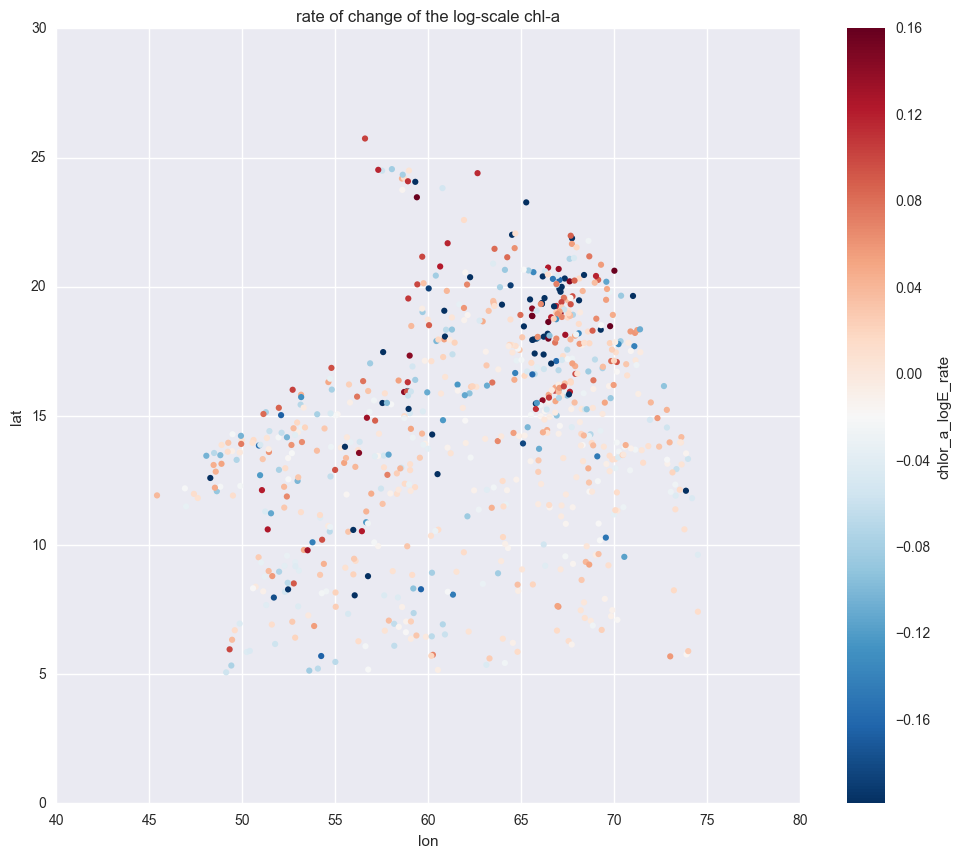

In [6]:
# visualize the ROC of log(chl_a) around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_3.plot(kind='scatter', x='lon', y='lat', c='chlor_a_logE_rate', cmap='RdBu_r', vmin=check2.median()-0.5*check2.std(), vmax=check2.max(), edgecolor='none', ax=ax, title = 'rate of change of the log-scale chl-a')

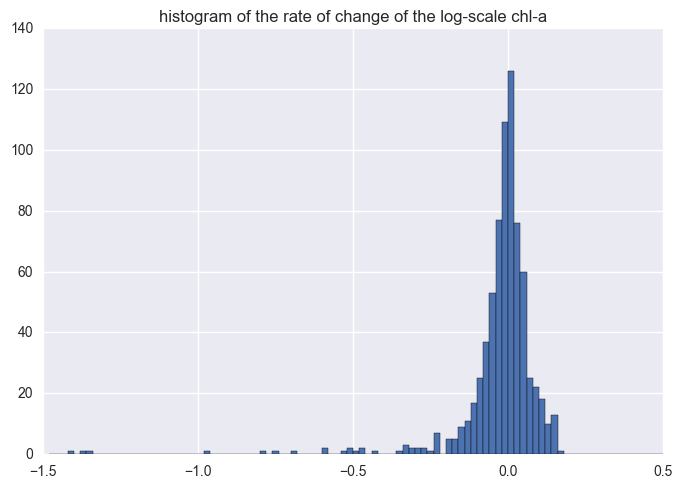

In [7]:
# histogram for non standarized data
axdf_chl = df_chl_out_3.chlor_a_logE_rate.dropna().hist(bins=100,range=[-1.5,0.5]) # there are very a few small values on the left
axdf_chl.set_title('histogram of the rate of change of the log-scale chl-a')

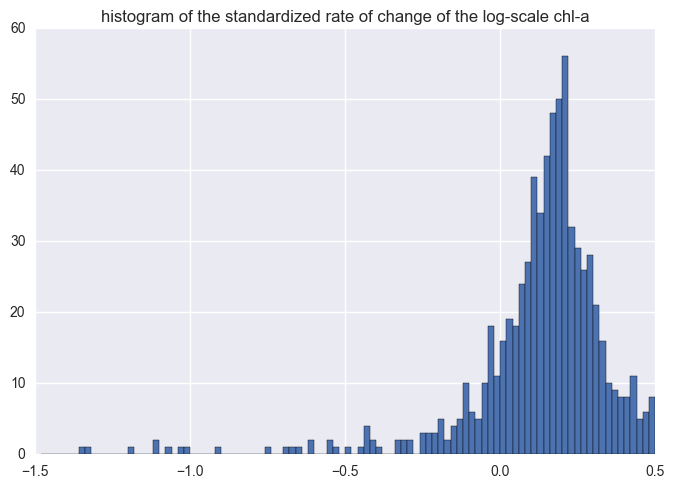

In [8]:
# standarized series
tmp = df_chl_out_3.chlor_a_logE_rate.dropna()
tmp = (tmp - tmp.mean())/tmp.std()
axdf_chl_stdan = tmp.hist(bins=100,range=[-1.5,0.5])   # there are very a few small values on the left
axdf_chl_stdan.set_title('histogram of the standardized rate of change of the log-scale chl-a')

In [20]:
(np.log(0.130267)-np.log(0.132351))   / freq

-0.0026452156695248399

In [10]:
###########################
# On 2D-subsampling Dataset
###########################
# Val 1:
# id:10206, time:2002-11-07"
# (0.130267 - 0.132351) / (freq*.130267)    == -0.0026663186634629937
#########
# Val 2:
# id:10206, time:2002-11-07"
# (np.log(0.130267)-np.log(0.132351))   / freq == -0.0026452156695248399 # very close to the value above

df_chl_out_3.sort_values(by=['id', 'time']).head()

,id,time,lon,var_lon,vn,var_tmp,spd,var_lat,temp,lat,ve,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
5181,10206,2002-11-01,67.400875,0.001188,6.497542,1000.0,11.098375,0.000411,NaN,10.819333,-6.816792,0.132351,-0.878273,-0.011445,NaN,512.041,-0.014412
5440,10206,2002-11-07,67.149208,0.001453,3.659208,1000.0,6.336958,0.000476,NaN,11.107000,-2.266292,0.130267,-0.885166,-0.002084,NaN,540.917,-0.002666
6476,10206,2002-12-01,66.529750,0.003438,5.781167,1000.0,14.679250,0.001004,NaN,11.451333,-13.332292,0.127859,-0.893269,-0.009725,NaN,606.805,-0.012677
7771,10206,2002-12-31,64.004000,0.000999,-4.584875,1000.0,13.410292,0.000361,NaN,12.477292,-12.156875,0.189273,-0.722911,0.015523,-1.809038,890.850,0.013669
8807,10206,2003-01-24,62.110722,0.002644,-8.204294,1000.0,13.179000,0.000795,NaN,11.109556,-10.128765,0.225299,-0.647241,-0.113617,NaN,838.923,-0.084049


In [11]:
# convert into datetime
df_chl_out_3['time'] = pd.to_datetime(df_chl_out_3['time']) # ,format='%m/%d/%y %I:%M%p'
df_chl_out_3.sort_values(by=['id', 'time']).head()  # a check

,id,time,lon,var_lon,vn,var_tmp,spd,var_lat,temp,lat,ve,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
5181,10206,2002-11-01,67.400875,0.001188,6.497542,1000.0,11.098375,0.000411,NaN,10.819333,-6.816792,0.132351,-0.878273,-0.011445,NaN,512.041,-0.014412
5440,10206,2002-11-07,67.149208,0.001453,3.659208,1000.0,6.336958,0.000476,NaN,11.107000,-2.266292,0.130267,-0.885166,-0.002084,NaN,540.917,-0.002666
6476,10206,2002-12-01,66.529750,0.003438,5.781167,1000.0,14.679250,0.001004,NaN,11.451333,-13.332292,0.127859,-0.893269,-0.009725,NaN,606.805,-0.012677
7771,10206,2002-12-31,64.004000,0.000999,-4.584875,1000.0,13.410292,0.000361,NaN,12.477292,-12.156875,0.189273,-0.722911,0.015523,-1.809038,890.850,0.013669
8807,10206,2003-01-24,62.110722,0.002644,-8.204294,1000.0,13.179000,0.000795,NaN,11.109556,-10.128765,0.225299,-0.647241,-0.113617,NaN,838.923,-0.084049


In [12]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist}
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist, chlor_a_log10_rate}

# 3 represents 3 features: {temp, chl_rate, dist}
# 4 represents 4 features: {temp, chl_rate, dist, chlor_a_log10_rate }
print('out_filename:', out_filename)
df_chl_out_3.to_csv(out_filename, sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv(out_filename, index_col='index')

# a check
test.sort_values(by=['id', 'time']).head()

out_filename: df_chl_out_6D_modisa_4.csv


,id,time,lon,var_lon,vn,var_tmp,spd,var_lat,temp,lat,ve,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
5181,10206,2002-11-01,67.400875,0.001188,6.497542,1000.0,11.098375,0.000411,NaN,10.819333,-6.816792,0.132351,-0.878273,-0.011445,NaN,512.041,-0.014412
5440,10206,2002-11-07,67.149208,0.001453,3.659208,1000.0,6.336958,0.000476,NaN,11.107000,-2.266292,0.130267,-0.885166,-0.002084,NaN,540.917,-0.002666
6476,10206,2002-12-01,66.529750,0.003438,5.781167,1000.0,14.679250,0.001004,NaN,11.451333,-13.332292,0.127859,-0.893269,-0.009725,NaN,606.805,-0.012677
7771,10206,2002-12-31,64.004000,0.000999,-4.584875,1000.0,13.410292,0.000361,NaN,12.477292,-12.156875,0.189273,-0.722911,0.015523,-1.809038,890.850,0.013669
8807,10206,2003-01-24,62.110722,0.002644,-8.204294,1000.0,13.179000,0.000795,NaN,11.109556,-10.128765,0.225299,-0.647241,-0.113617,NaN,838.923,-0.084049


In [13]:
## check the week numbers of the range from Nov-01-01 to Mar-01-01
for year in range(2002, 2017):
    print(str(year)+'-11-01 is week', datetime.datetime(year, 11, 1).isocalendar()[1])  # 44, 45, 

print('----')
for year in range(2002, 2017):
    print(str(year)+'-3-31 is week', datetime.datetime(year, 3, 31).isocalendar()[1])  # 13, 14

plt.show()

2002-11-01 is week 44
2003-11-01 is week 44
2004-11-01 is week 45
2005-11-01 is week 44
2006-11-01 is week 44
2007-11-01 is week 44
2008-11-01 is week 44
2009-11-01 is week 44
2010-11-01 is week 44
2011-11-01 is week 44
2012-11-01 is week 44
2013-11-01 is week 44
2014-11-01 is week 44
2015-11-01 is week 44
2016-11-01 is week 44
----
2002-3-31 is week 13
2003-3-31 is week 14
2004-3-31 is week 14
2005-3-31 is week 13
2006-3-31 is week 13
2007-3-31 is week 13
2008-3-31 is week 14
2009-3-31 is week 14
2010-3-31 is week 13
2011-3-31 is week 13
2012-3-31 is week 13
2013-3-31 is week 13
2014-3-31 is week 14
2015-3-31 is week 14
2016-3-31 is week 13


the min and max of the week index is 1, 53 :


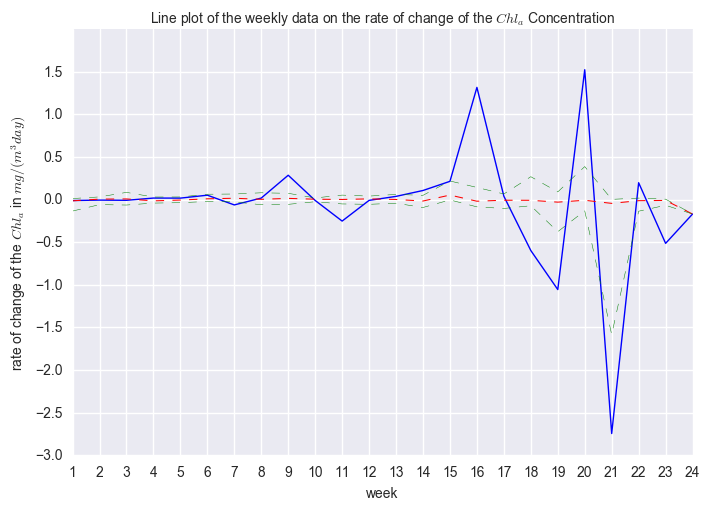

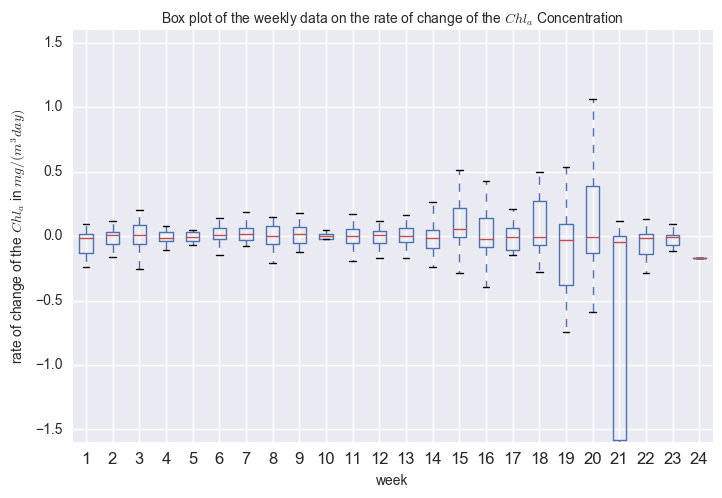

In [14]:
##### weekly plot on the Lagrangian rate of change of the chl-a
#sns.set(style="white")
#sns.set(color_codes=True)

### 
# Approach 1 depreciated
#grouped = df_timed.chl_rate.groupby(df_timed.index.week)
#grouped.plot.box()

### 
# Approach 2
# prepare data  a. use index or columns to group

###
# select the corresponding weeks, prepare the data
df_timed = df_chl_out_3.set_index('time')
df_timed['week'] = df_timed.index.week

mask_NovMar = (df_timed.week<=14) | (df_timed.week >=44)
df_timed_NovMar = df_timed[mask_NovMar]
#df_timed_NovMar.head()

# now rotate the index to make Nov-01-01 the first month
print('the min and max of the week index is %d, %d :' % (df_timed_NovMar.week.min(), df_timed_NovMar.week.max()) )
# make the 44th week the 1st week
df_timed_NovMar['week_rotate'] = (df_timed_NovMar.week + 10 ) % 53
df_timed_NovMar.week_rotate.describe() # now from 1 to 24


axes1=df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-3,2)
axes1.set_title("Line plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-3, 2, 0.5))
plt.xticks(np.arange(1, 25, 1))
plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chl_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1.6,1.6)
axes2.set_title("Box plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.show()

# the rate of change is slower on the regular scale

#matplotlib.pyplot.close("all")

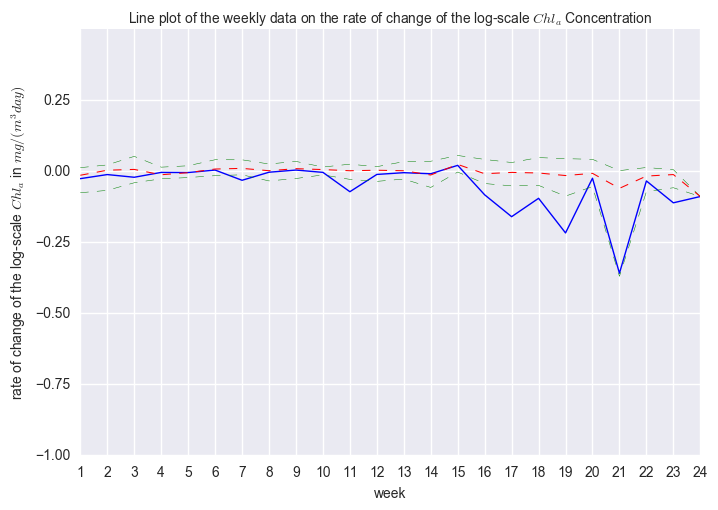

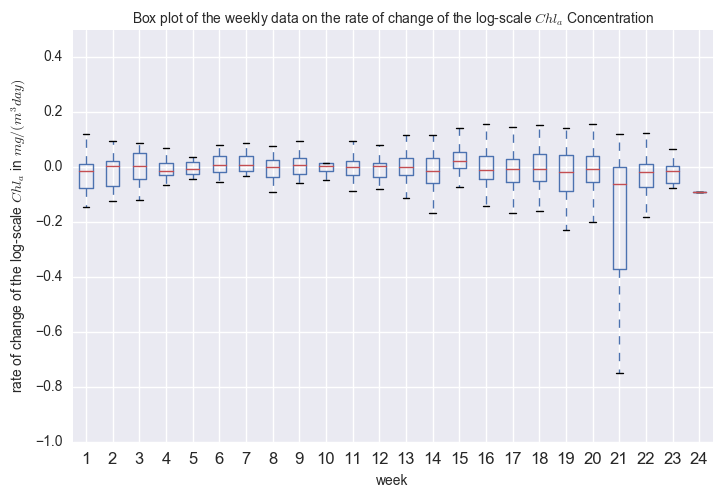

In [15]:
# weekly plot on the Lagrangian rate of change of the log-scale chl-a
# This is the rate of change on the exponential scale
axes1=df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-1,0.5)
axes1.set_title("Line plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-1, 0.5, 0.25))
plt.xticks(np.arange(1, 25, 1))
#plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chlor_a_logE_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1,0.5)
axes2.set_title("Box plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
#plt.show()


#plt.close('all')

In [16]:
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



 summary of the Chl_rate 
 count    107.000000
mean      -0.003057
std        0.127664
min       -0.314036
25%       -0.051853
50%       -0.005549
75%        0.038812
max        0.617254
Name: chl_rate, dtype: float64


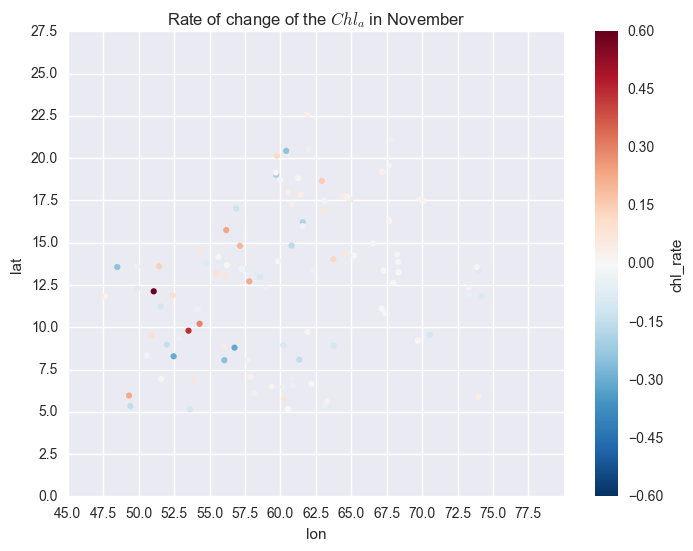



 summary of the Chl_rate 
 count    115.000000
mean       0.013725
std        0.236352
min       -1.591152
25%       -0.033967
50%        0.011980
75%        0.068723
max        1.029209
Name: chl_rate, dtype: float64


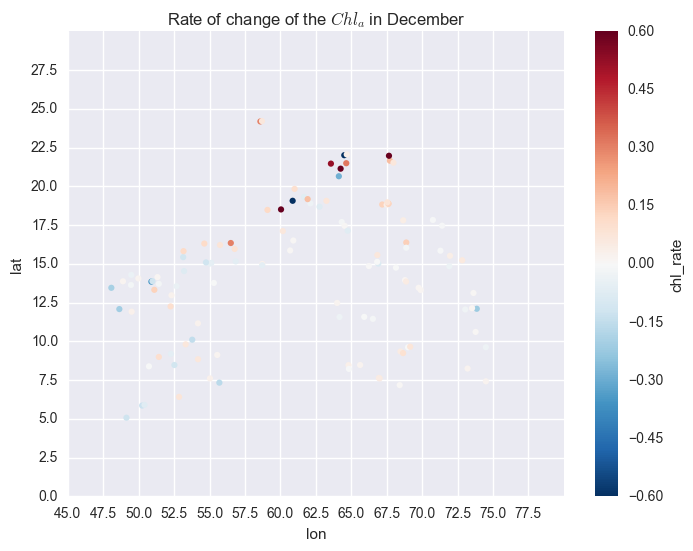



 summary of the Chl_rate 
 count    173.000000
mean       0.081537
std        1.083109
min       -9.201785
25%       -0.058736
50%        0.004676
75%        0.086253
max        9.436026
Name: chl_rate, dtype: float64


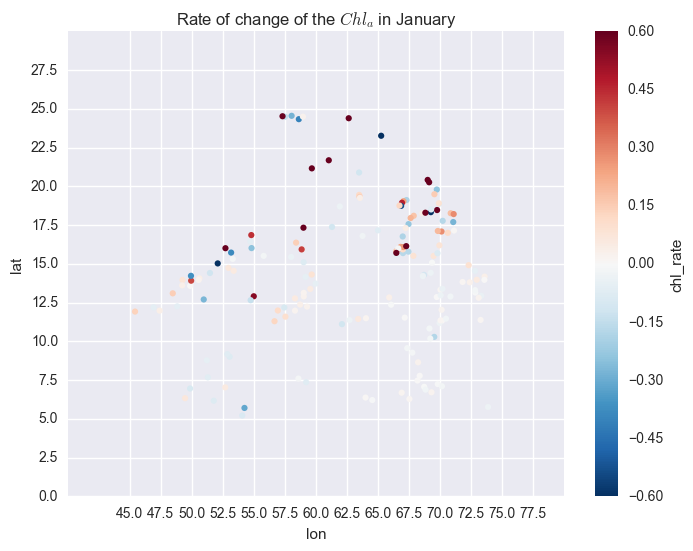



 summary of the Chl_rate 
 count    185.000000
mean      -0.018115
std        8.207964
min      -61.745387
25%       -0.119316
50%       -0.009475
75%        0.128890
max       46.203613
Name: chl_rate, dtype: float64


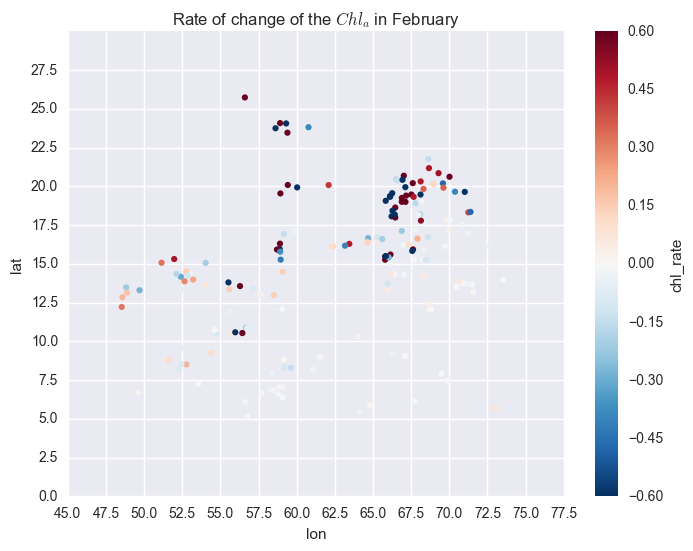



 summary of the Chl_rate 
 count    165.000000
mean      -0.408649
std        4.984929
min      -32.863400
25%       -0.214682
50%       -0.017424
75%        0.012679
max       24.273974
Name: chl_rate, dtype: float64


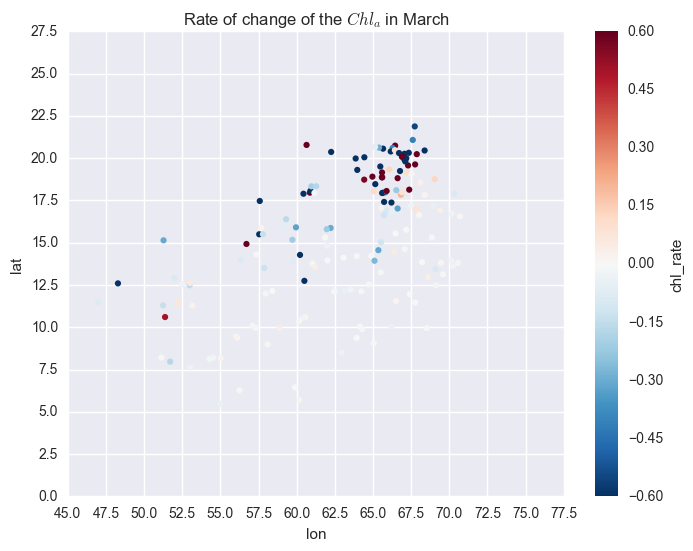

In [17]:
# spatial plot for different months --  totally five months 1, 2, 3, 11, 12, 
for i in range(0,5,1):
    month_ind = np.array([11,12,1,2,3])
    month_names = ['November', 'December','January','February', 'March']
    aa = df_timed_NovMar[df_timed_NovMar.index.month == month_ind[i]]
    fig, ax  = plt.subplots(figsize=(8,6))
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.median()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.median()-0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.mean()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.mean()+0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    print('\n\n summary of the Chl_rate \n', aa.chl_rate.describe())
    aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=-0.6, vmax=0.6, edgecolor='none', ax=ax, title = 'Rate of change of the $Chl_a$ in %s' % (month_names[i]))
    plt.xticks(np.arange(45, 80, 2.5))
    plt.yticks(np.arange(0, 28, 2.5))
    plt.show()

In [18]:
print("test")

test
